In [1]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np 


In [2]:
# Upload & initial exploration the file

In [3]:
data = pd.read_csv('BerlinHousing4049.csv') # Uploading the csv file


In [4]:
# Data Exploration

In [9]:
print(data.shape) #Number of Rows & Columns
print(data.columns) #exhibit columns names 
print(data.info()) # showing the data type, missing values, used memory
print(data.describe()) #Display a statistical summary of the data frame

(9999, 11)
Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_total', 'floors',
       'condition', 'grade', 'built', 'renovated', 'living_area_sqft'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             9990 non-null   float64
 1   bedrooms          9988 non-null   float64
 2   bathrooms         9990 non-null   float64
 3   sqft_living       9992 non-null   float64
 4   sqft_total        9994 non-null   float64
 5   floors            9999 non-null   float64
 6   condition         9998 non-null   float64
 7   grade             9999 non-null   int64  
 8   built             9996 non-null   float64
 9   renovated         9999 non-null   int64  
 10  living_area_sqft  9988 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 859.4 KB
None
              price     bedrooms    bath

In [10]:
#Preprocessoring

In [13]:
#Type Conversion & Correction

data['built'] = pd.to_datetime(data['built'], format='%Y', errors='coerce') # pd.Datat type(Data Frame)
data['renovated'] = pd.to_datetime(data['renovated'], format='%Y', errors='coerce') 

#format='%Y': When the input data is only one year.  The year 1990 is entered, considered as 01.01.1990.
#format= '%Y/%m/%d’: If the input data includes month and day.
# errors='coerce': Converts invalid values to NAN value
data.to_csv("BerlinHousing4049.csv", index=False)
data.to_csv("BerlinHousing4049_clean_sckwedness.csv", index=False)# Creating a new data frame for sckwedness
data.info(5) # Check for change datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   price             9990 non-null   float64       
 1   bedrooms          9988 non-null   float64       
 2   bathrooms         9990 non-null   float64       
 3   sqft_living       9992 non-null   float64       
 4   sqft_total        9994 non-null   float64       
 5   floors            9999 non-null   float64       
 6   condition         9998 non-null   float64       
 7   grade             9999 non-null   int64         
 8   built             9996 non-null   datetime64[ns]
 9   renovated         459 non-null    datetime64[ns]
 10  living_area_sqft  9988 non-null   float64       
dtypes: datetime64[ns](2), float64(8), int64(1)
memory usage: 859.4 KB


In [15]:
#Removing the Duplicates values
dupli_count = data.duplicated().sum() # collecting the duplicated rows 
data_cle = data.drop_duplicates() # Removing
print(f"\nNumber of Duplicate Rows Removed: {dupli_count}")
data_cle.to_csv("BerlinHousing4049.csv", index=False) # apply the changes to file
data.to_csv("BerlinHousing4049_clean_sckwedness.csv", index=False)


Number of Duplicate Rows Removed: 2


In [17]:
# Explority for (NAN, missing, None) values

In [19]:
df= pd.DataFrame(data) 
missed_data= df.isnull().sum() # counting the missed values and collecting their quantity
print("Number of Miseed Data:     ", missed_data)
df_fill=df.fillna(df.median(numeric_only=True), inplace=True) # filling the missed values with the median of their columns
data_cle.to_csv("BerlinHousing4049.csv", index=False) # apply the changes to file                                           
# inplace= True method applies the changes directly to the data frame
data_cle.to_csv("BerlinHousing4049_clean_sckwedness.csv", index=False)
print(df_fill)

Number of Miseed Data:      price                  9
bedrooms              11
bathrooms              9
sqft_living            7
sqft_total             5
floors                 0
condition              1
grade                  0
built                  3
renovated           9540
living_area_sqft      11
dtype: int64
None


In [21]:
# Calculating the price based on the foot square of the houses

In [23]:

data['price_per_sqft'] =(data['price'] / data['sqft_total']).round(3) # Calculate the price of each square meter based on price and square footage      
                                                                      # with three decimal places
data.head(50)


,price,bedrooms,bathrooms,sqft_living,sqft_total,floors,condition,grade,built,renovated,living_area_sqft,price_per_sqft
0,221900.0,3.0,1.00,1180.0,5650.0,1.0,3.0,7,1955-01-01,NaT,1340.0,39.274
1,538000.0,3.0,2.00,2570.0,7242.0,2.0,3.0,7,1951-01-01,1991-01-01,1690.0,74.289
2,180000.0,2.0,1.00,770.0,10000.0,1.0,3.0,6,1933-01-01,NaT,2720.0,18.000
3,604000.0,4.0,3.00,1960.0,5000.0,1.0,5.0,7,1965-01-01,NaT,1360.0,120.800
4,510000.0,3.0,2.00,1680.0,8080.0,1.0,3.0,8,1987-01-01,NaT,1830.0,63.119
5,1225000.0,4.0,4.50,5420.0,101930.0,1.0,3.0,11,2001-01-01,NaT,4760.0,12.018
6,257500.0,3.0,2.25,1715.0,6819.0,2.0,3.0,7,1995-01-01,NaT,2238.0,37.762
7,291850.0,3.0,1.50,1060.0,9711.0,1.0,3.0,7,1963-01-01,NaT,1650.0,30.054
8,229500.0,3.0,1.00,1780.0,7470.0,1.0,3.0,7,1960-01-01,NaT,1780.0,30.723
9,323000.0,3.0,2.50,1890.0,7916.5,2.0,3.0,7,2003-01-01,NaT,2390.0,40.801


In [25]:
# Standardzation

In [27]:
from sklearn.preprocessing import StandardScaler #Enter the class of StandardScaler normalization method
scaler = StandardScaler() # an object of the StandardScaler class named scaler is created

data[['price','sqft_total','sqft_living', 'living_area_sqft']] = scaler.fit_transform(data[['price','sqft_total','sqft_living',
                                                                                            'living_area_sqft']])# Applying Normalization
data.to_csv("BerlinHousing4049csv", index=False)# save the Transforms in the orginal file

data.head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_total,floors,condition,grade,built,renovated,living_area_sqft,price_per_sqft
0,-0.826502,3.0,1.0,-0.958208,-0.230604,1.0,3.0,7,1955-01-01,NaT,-0.946133,39.274
1,0.012608,3.0,2.0,0.567474,-0.195259,2.0,3.0,7,1951-01-01,1991-01-01,-0.425313,74.289
2,-0.937729,2.0,1.0,-1.408230,-0.134026,1.0,3.0,6,1933-01-01,NaT,1.107384,18.000
3,0.187810,4.0,3.0,-0.102070,-0.245036,1.0,5.0,7,1965-01-01,NaT,-0.916372,120.800
4,-0.061720,3.0,2.0,-0.409402,-0.176653,1.0,3.0,8,1987-01-01,NaT,-0.216986,63.119


In [29]:
#handeling the outliers values

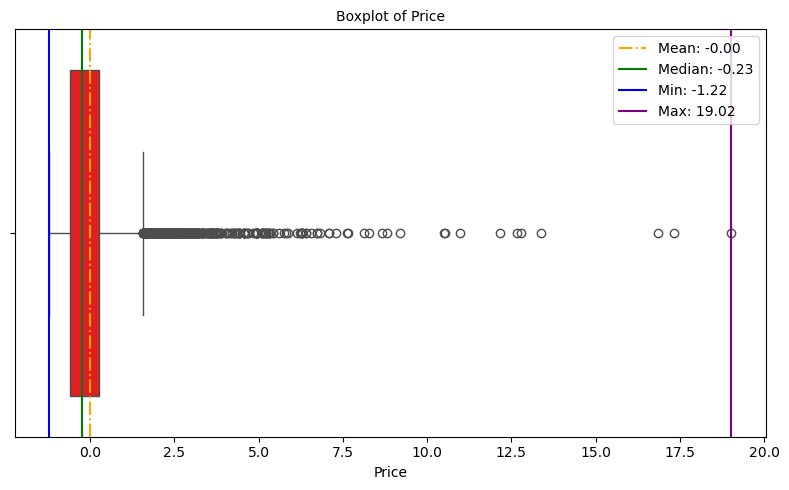

In [31]:

plt.figure(figsize=(8, 5)) #Adjust the size of the chart frame
sns.boxplot(x=data['price'], color='red', showfliers=True)# Drawing the box diagram for price in order to distribution data,
                                                            #Quartiles and statistical distribution

min_val = data['price'].min() # calculating the min of price column
max_val = data['price'].max() # calculating the max of price column
median_val = data['price'].median() # calculating the median of price column
mean_val = data['price'].mean() # calculating the mean of price column

#Drawing lines of statistical descriptions
plt.axvline(mean_val, color='orange', linestyle='-.', label=f'Mean: {mean_val:.2f}') #drawing an orange line to showing Mean
plt.axvline(median_val, color='green', linestyle='-', label=f'Median: {median_val:.2f}')#drawing an orange line to showing Median
plt.axvline(min_val, color='blue', linestyle='-', label=f'Min: {min_val:.2f}') #drawing an orange line to showing min
plt.axvline(max_val, color='purple', linestyle='-', label=f'Max: {max_val:.2f}') #drawing an orange line to showing max

plt.title('Boxplot of Price' , fontsize=10)
plt.xlabel('Price')
plt.legend(loc='upper right') # creating a legend box
plt.tight_layout()
plt.show()

In [33]:
# Finding Outliers

Number of rows after removing outliers: 9498


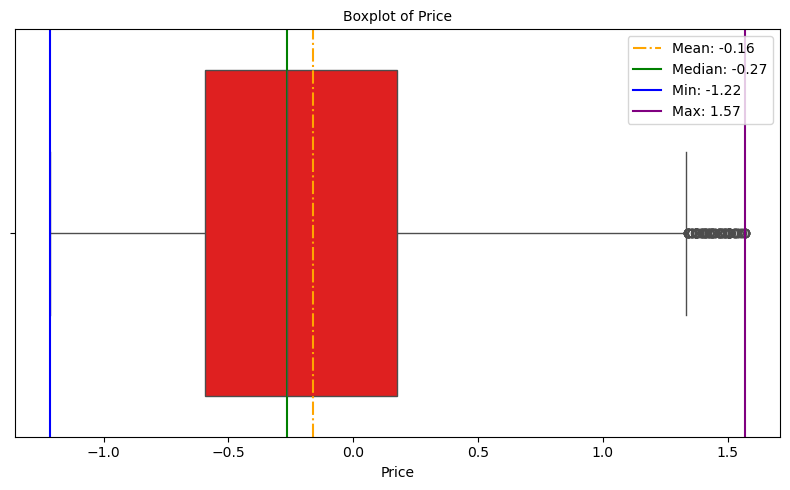

In [35]:
Q1_price = data['price'].quantile(0.25)  # Assign 25% of  price column data to Q1_price
Q3_price = data['price'].quantile(0.75) #Assign 75% of price column data to Q3_price
IQR_price = Q3_price - Q1_price         #Calculate the distance between Q1 and Q2 to get the distance between these two quadrants
lower_bound_price = Q1_price - 1.5 * IQR_price  #Calculation of  Low quadrants
upper_bound_price = Q3_price + 1.5 * IQR_price   #Calculation of High  quadrants
data = data[(data['price'] >= lower_bound_price) & (data['price'] <= upper_bound_price)] # Remove the price column outliers
print("Number of rows after removing outliers:", len(data)) # show the number of removed rows
plt.figure(figsize=(8, 5)) #Adjust the size of the chart frame
sns.boxplot(x=data['price'], color='red', showfliers=True)# Drawing the box diagram for price in order to distribution data,
                                                            #Quartiles and statistical distribution
min_val = data['price'].min() # calculating the min of price column
max_val = data['price'].max() # calculating the max of price column
median_val = data['price'].median() # calculating the median of price column
mean_val = data['price'].mean() # calculating the mean of price column
#Drawing lines of statistical descriptions
plt.axvline(mean_val, color='orange', linestyle='-.', label=f'Mean: {mean_val:.2f}') #drawing an orange line to showing Mean
plt.axvline(median_val, color='green', linestyle='-', label=f'Median: {median_val:.2f}')#drawing an orange line to showing Median
plt.axvline(min_val, color='blue', linestyle='-', label=f'Min: {min_val:.2f}') #drawing an orange line to showing min
plt.axvline(max_val, color='purple', linestyle='-', label=f'Max: {max_val:.2f}') #drawing an orange line to showing max
plt.title('Boxplot of Price' , fontsize=10)
plt.xlabel('Price')
plt.legend(loc='upper right') # creating a legend box
plt.tight_layout()
data_cle.to_csv("BerlinHousing4049.csv", index=False) 
data_cle.to_csv("BerlinHousing4049_clean_sckwedness.csv", index=False)
plt.show()

In [37]:
#Descriptive statistics

In [39]:
# Statistic Report

print(data.describe(include='all'))# Because of using all, All numeric properties display all numeric and non-numeric columns


             price     bedrooms    bathrooms  sqft_living   sqft_total  \
count  9498.000000  9498.000000  9498.000000  9498.000000  9498.000000   
mean     -0.161668     3.326806     2.003316    -0.108475    -0.010746   
min      -1.216459     1.000000     0.500000    -1.836299    -0.343346   
25%      -0.595289     3.000000     1.500000    -0.727710    -0.236899   
50%      -0.266122     3.000000     2.000000    -0.233784    -0.182870   
75%       0.177191     4.000000     2.500000     0.380879    -0.116331   
max       1.570842    11.000000     7.500000     5.956752    36.307378   
std       0.553466     0.895838     0.707983     0.844376     0.965261   

            floors    condition        grade                          built  \
count  9498.000000  9498.000000  9498.000000                           9495   
mean      1.412771     3.443041     7.473468  1967-02-12 09:35:32.701421808   
min       1.000000     1.000000     3.000000            1900-01-01 00:00:00   
25%       1.00000

           bedrooms  bathrooms  sqft_living  sqft_total  floors  condition  \
price                                                                        
-1.216459       1.0      2.000    -1.517991    0.607009     1.0   3.000000   
-1.203186       1.0      0.750    -1.781418   -0.243925     1.0   2.000000   
-1.197877       3.0      1.000    -1.309444   -0.124568     1.0   3.000000   
-1.196549       2.0      1.000    -1.682633    0.139813     1.0   2.000000   
-1.192567       2.0      1.000    -1.485062    0.090880     1.0   3.000000   
-1.179295       3.0      1.000    -1.265540   -0.250586     1.0   4.000000   
-1.176773       1.0      1.000    -1.627752   -0.265461     1.0   3.000000   
-1.176640       1.0      1.000    -1.397253   -0.267238     1.0   3.000000   
-1.163367       1.5      0.875    -1.397253   -0.197346     1.0   3.500000   
-1.159385       3.0      1.000    -1.331397   -0.087601     1.0   3.000000   
-1.152749       2.0      1.000    -1.199683   -0.173190     1.0 

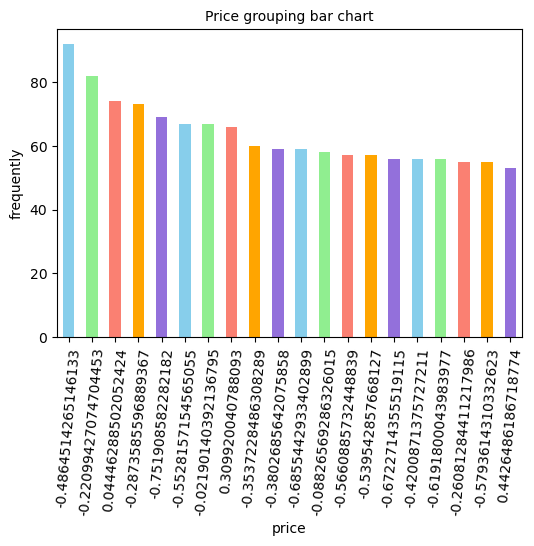

In [41]:
#Data grouping and average Catigurization
grouped_data = data.groupby(['price']).mean() #Grouping and average
plt.figure(figsize=(8, 2))
colors = ['skyblue', 'lightgreen', 'salmon', 'orange', 'MediumPurple'] # for making a barchart colorfull
print(grouped_data.head(20)) # Display 20 rows of data frame data
data['price'].value_counts().head(20).plot(kind='bar', figsize=(6,4), color=colors , rot=85) # Create a bar chart of (20) frequently for more readability
# rot=85:Create a 45 degree angle to insert price mean on x axis to avoid overlapping
plt.title('Price grouping bar chart',fontsize=10) 
plt.ylabel('frequently')
plt.show()

In [43]:
# Visualization

In [45]:
#Distribution Histogram

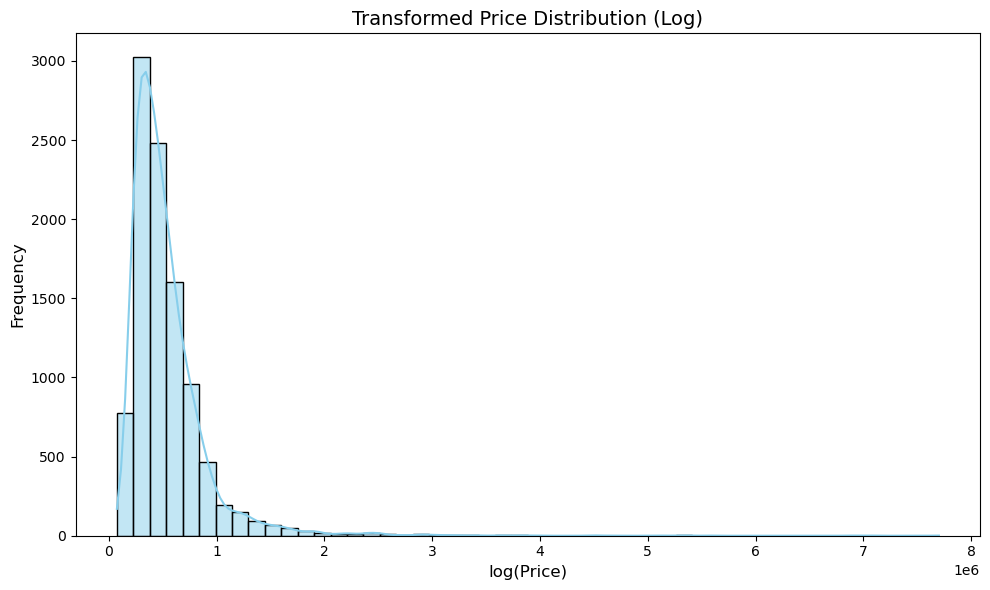

In [47]:
# Distribution of 'price
df=pd.read_csv("BerlinHousing4049_clean_sckwedness.csv") # Refer to un-normalized Data Frame
df_clean =df['price'].dropna() # Remove zero values to avoid NAN error.
df_clean = df_clean[df_clean > 0]  # Remove invalid values

plt.figure(figsize=(10,6))  # Setting Chart dimensions
sns.histplot((df_clean), kde=True, bins=50, color="skyblue", edgecolor="black")# Drawing chart
# bins= 50 : The more it is, the more details are displayed from the histogram
# Kde=True: Display the density curve
plt.title('Transformed Price Distribution (Log)', fontsize=14) # setting chart title
plt.xlabel('log(Price)', fontsize=12)# setting horizental title
plt.ylabel('Frequency', fontsize=12)#setting vertical title

plt.tight_layout() # Setting intervalsn
plt.show()

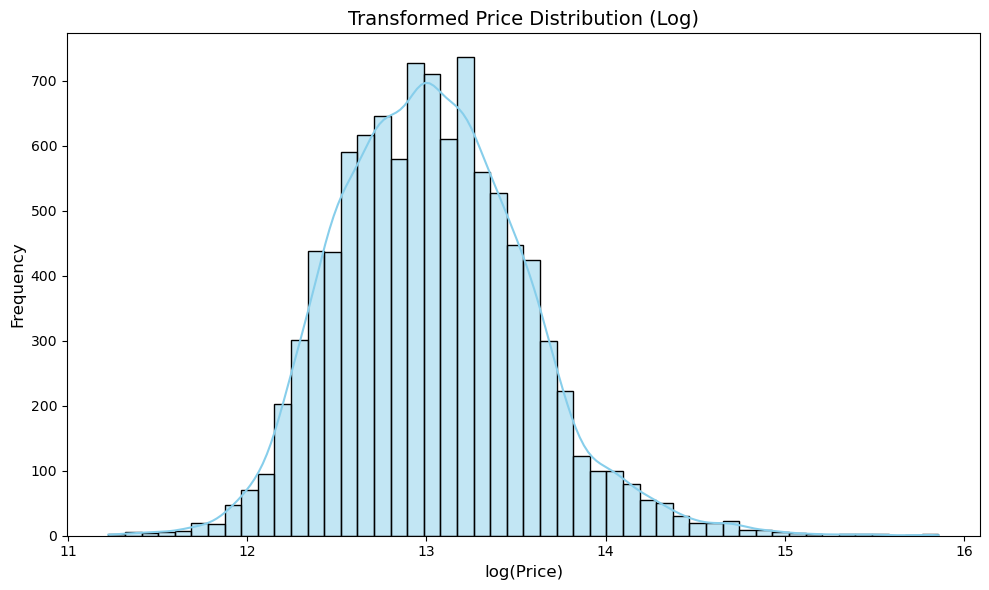

In [49]:
# Distribution of 'price
df=pd.read_csv("BerlinHousing4049_clean_sckwedness.csv") 
df_clean = df['price'].dropna() 
df_clean = df_clean[df_clean > 0]  

plt.figure(figsize=(10,6))  
sns.histplot(np.log(df_clean), kde=True, bins=50, color="skyblue", edgecolor="black") # Applying the log() for creat Symmetric distribution graph

plt.title('Transformed Price Distribution (Log)', fontsize=14) 
plt.xlabel('log(Price)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.tight_layout() # Setting intervalsn
plt.show()

In [51]:
# Survey the Relationships of Price

In [ ]:

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 15)) #Setting the size of the chart frame and the number of rows and columns for chart layout
axes = axes.flatten() #Creates a two-dimensional array for easier access to the axes of the graph


variables = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_total', 'floors', 
             'condition', 'grade', 'built', 'renovated', 'living_area_sqft']


for i, col in enumerate(variables):  # Drawwing a scatter plot for each variable
    sns.scatterplot(data, x=col, y='price', ax=axes[i], color='red', alpha=0.5) 
    axes[i].set_title(f' {col} vs price', fontsize=8)
    axes[i].set_xlabel(col, fontsize=8)
    axes[i].set_ylabel('Price', fontsize=8)


plt.tight_layout()
plt.show()

In [ ]:
#Square living and Square living area analysis
#Scatter plot for 'square living' vs 'Square living area'
plt.figure(figsize=(5, 4))
sns.scatterplot(x='sqft_living', y='living_area_sqft', data=data)# Drawing the scatter plot of two variables
plt.title('sqft_living vs living_area_sqft')
plt.xlabel('Square living')
plt.ylabel('square living area')
plt.show()

In [ ]:
#Attribute Correlation

In [ ]:
# correlation matrix
correlation_matrix = data[['price','sqft_total','sqft_living', 'living_area_sqft','bedrooms', 'bathrooms','floors',
                           'condition', 'grade', 'built', 'renovated']].corr() #calculating the correlation matrix

# Visualize correlation matrix
plt.figure(figsize=(8,8)) #Adjust the size of the chart frame
sns.heatmap(correlation_matrix, annot=True, cmap='Spectral', fmt='.2f')#Drawing a correlation diagram as a heatmap 
plt.title('Correlation Matrix')# adjust title for diagram
plt.show()# depicting diagram

(9997, 11)
Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_total', 'floors',
       'condition', 'grade', 'built', 'renovated', 'living_area_sqft'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9997 entries, 0 to 9996
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             9988 non-null   float64
 1   bedrooms          9986 non-null   float64
 2   bathrooms         9988 non-null   float64
 3   sqft_living       9990 non-null   float64
 4   sqft_total        9992 non-null   float64
 5   floors            9997 non-null   float64
 6   condition         9996 non-null   float64
 7   grade             9997 non-null   int64  
 8   built             9994 non-null   object 
 9   renovated         458 non-null    object 
 10  living_area_sqft  9986 non-null   float64
dtypes: float64(8), int64(1), object(2)
memory usage: 859.2+ KB
None
              price     bedr

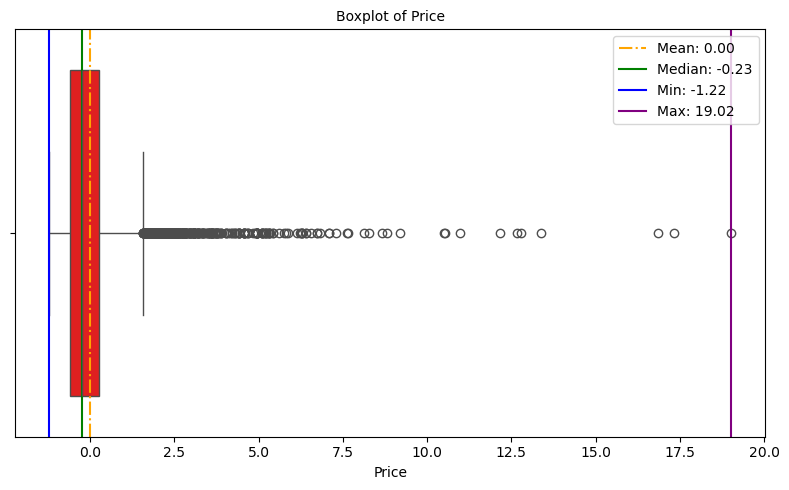

Number of rows after removing outliers: 9497


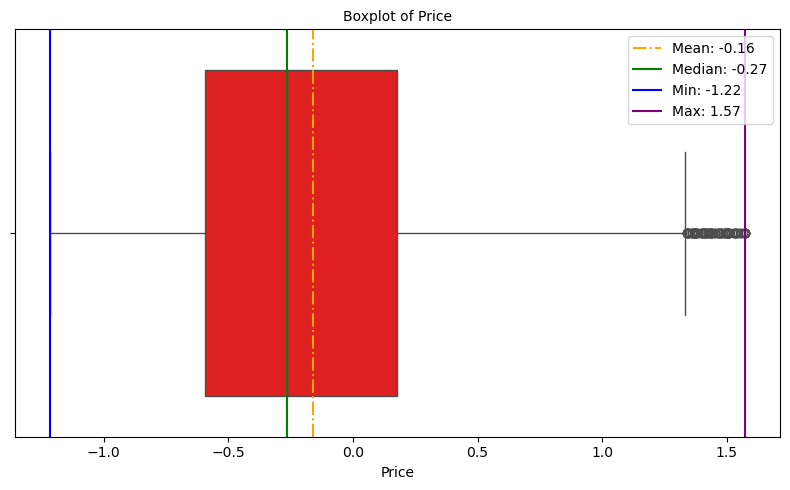

             price     bedrooms    bathrooms  sqft_living   sqft_total  \
count  9497.000000  9497.000000  9497.000000  9497.000000  9497.000000   
mean     -0.161504     3.327051     2.003501    -0.108268    -0.010749   
min      -1.216437     1.000000     0.500000    -1.836305    -0.343365   
25%      -0.595313     3.000000     1.500000    -0.727754    -0.236894   
50%      -0.266171     3.000000     2.000000    -0.233845    -0.182904   
75%       0.177110     4.000000     2.500000     0.380798    -0.116304   
max       1.573312    11.000000     7.500000     5.956480    36.303959   
std       0.553707     0.895920     0.708182     0.844596     0.965215   

            floors    condition        grade built renovated  \
count  9497.000000  9497.000000  9497.000000     0         0   
mean      1.412709     3.443087     7.473413   NaT       NaT   
min       1.000000     1.000000     3.000000   NaT       NaT   
25%       1.000000     3.000000     7.000000   NaT       NaT   
50%       1.0

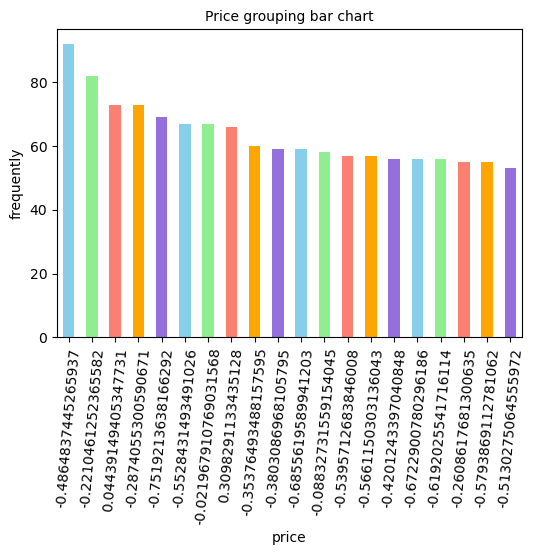

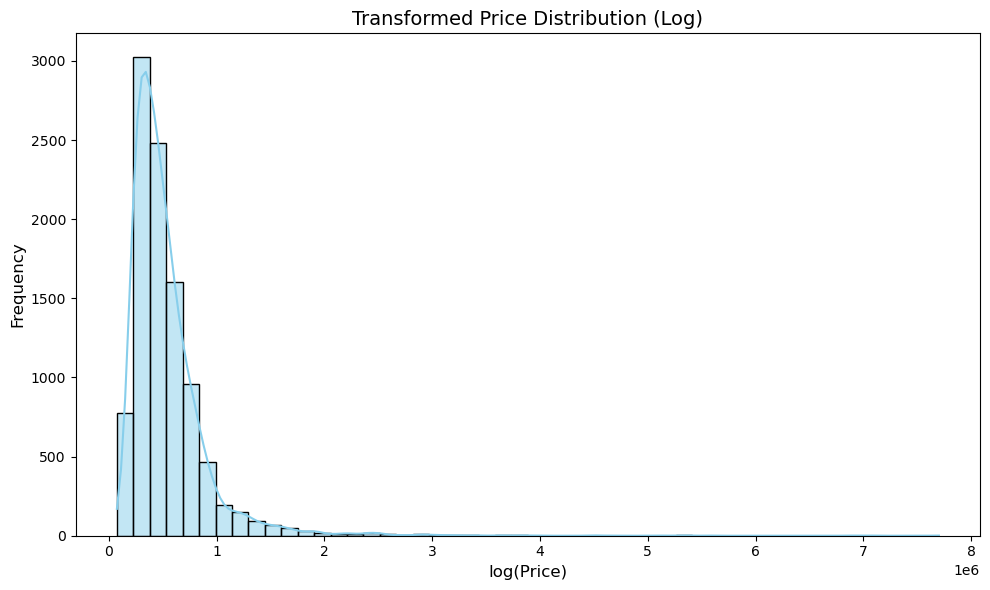

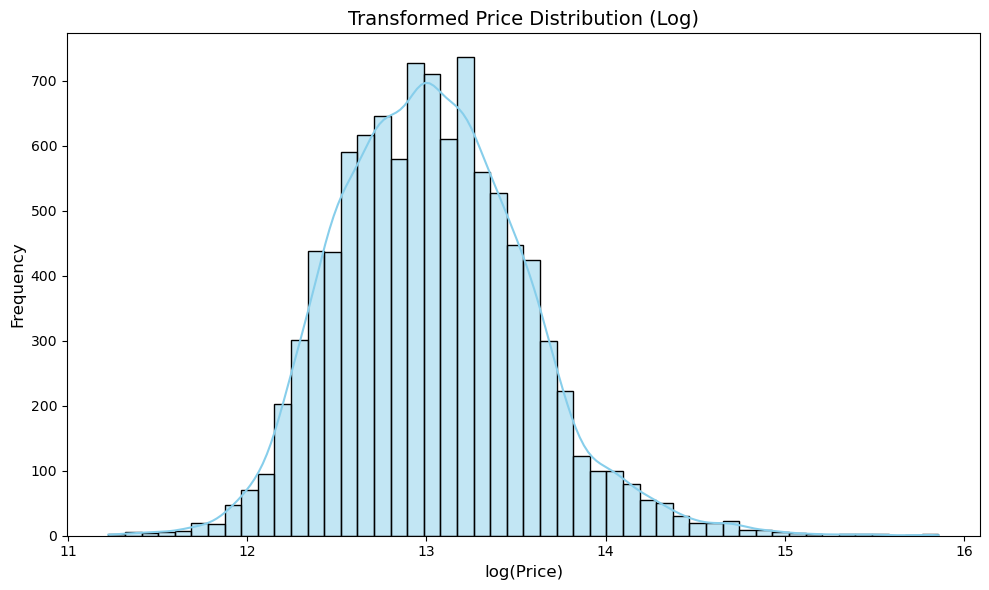

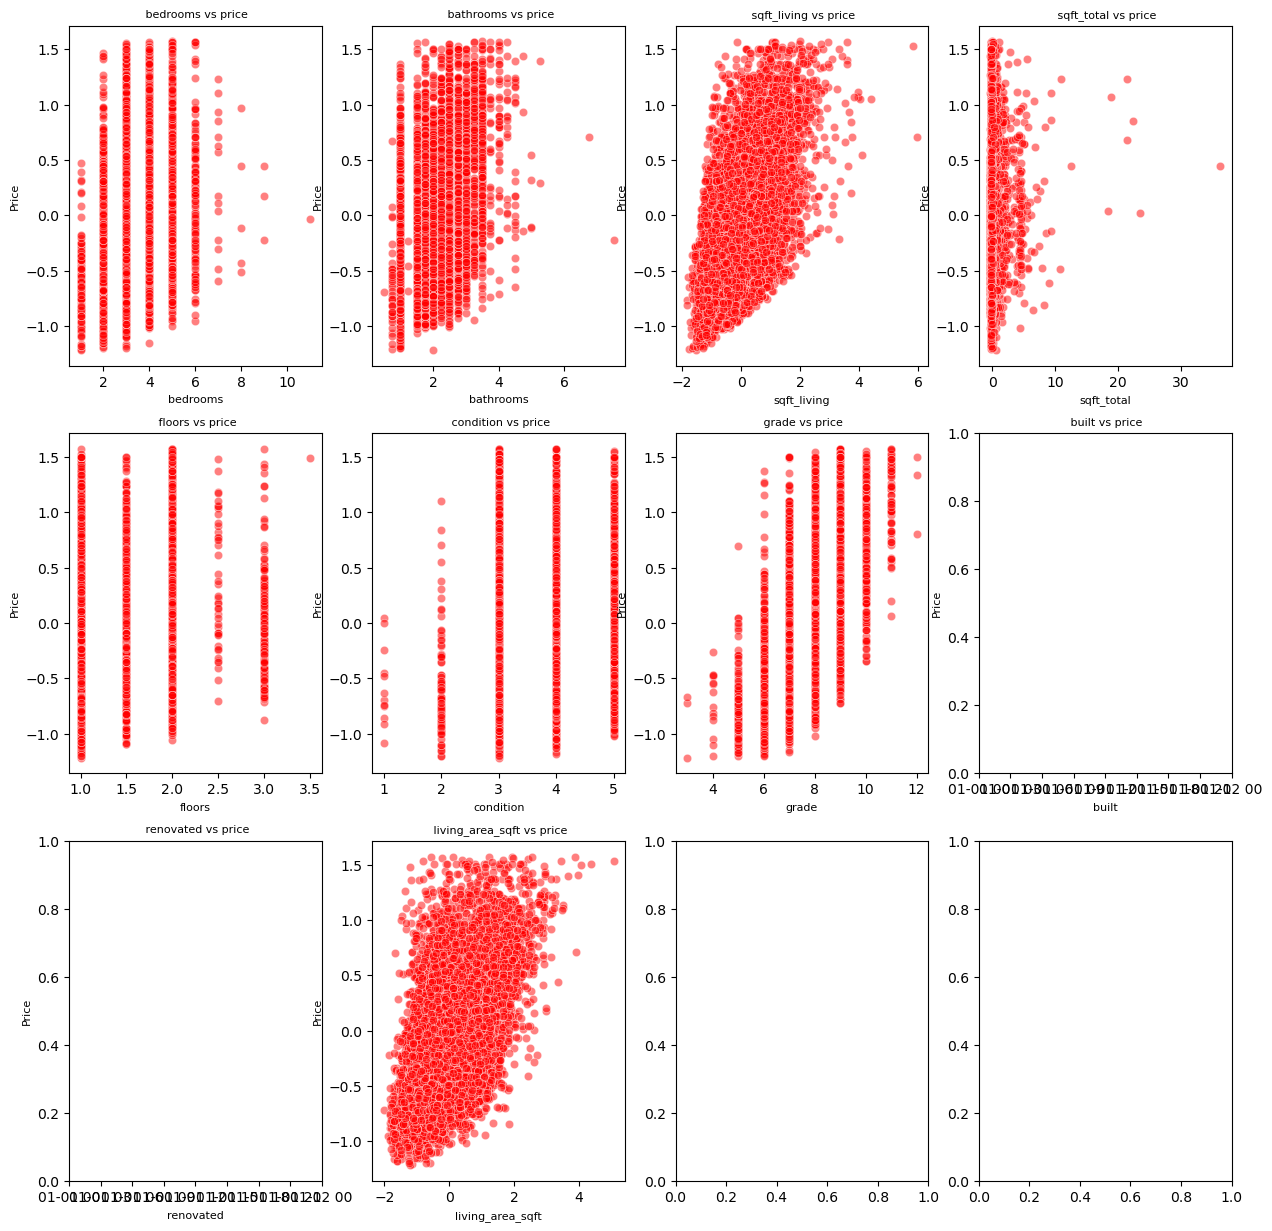

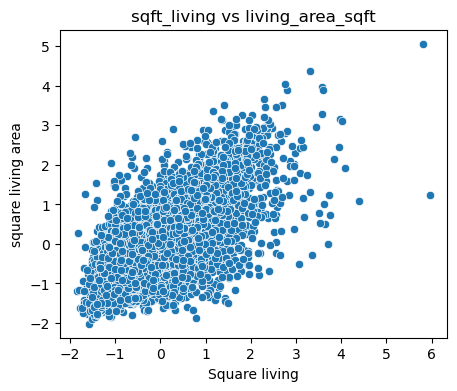

<Figure size 640x480 with 0 Axes>

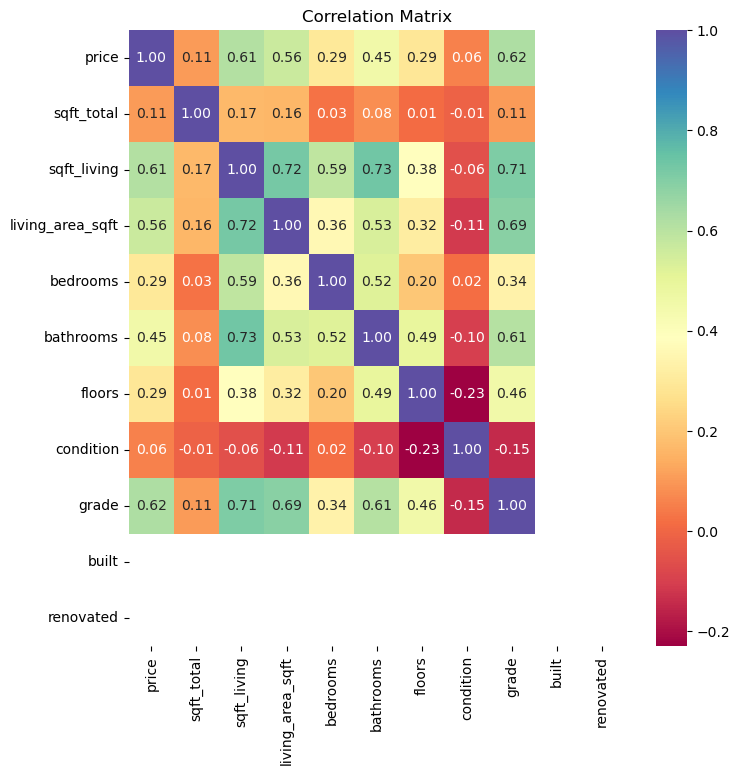

In [9]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
data = pd.read_csv('BerlinHousing4049.csv')
print(data.shape) 
print(data.columns) 
print(data.info()) 
print(data.describe()) 
data['built'] = pd.to_datetime(data['built'], format='%Y', errors='coerce') # pd.Datat type(Data Frame)
data['renovated'] = pd.to_datetime(data['renovated'], format='%Y', errors='coerce') 
data.to_csv("BerlinHousing4049.csv", index=False)
data.to_csv("BerlinHousing4049_clean_sckwedness.csv", index=False)
data.info(5) 
dupli_count = data.duplicated().sum() 
data_cle = data.drop_duplicates() 
print(f"\nNumber of Duplicate Rows Removed: {dupli_count}")
data_cle.to_csv("BerlinHousing4049.csv", index=False) 
data.to_csv("BerlinHousing4049_clean_sckwedness.csv", index=False)
df= pd.DataFrame(data) 
missed_data= df.isnull().sum()
print("Number of Miseed Data:     ", missed_data)
df_fill=df.fillna(df.median(numeric_only=True), inplace=True) 
data_cle.to_csv("BerlinHousing4049.csv", index=False)                                           
data_cle.to_csv("BerlinHousing4049_clean_sckwedness.csv", index=False)
print(df_fill)
data['price_per_sqft'] =(data['price'] / data['sqft_total']).round(3)                                                                      
print(data.head())



from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
data[['price','sqft_total','sqft_living', 'living_area_sqft']] = scaler.fit_transform(data[['price','sqft_total','sqft_living',
                                                                                            'living_area_sqft']])
data.to_csv("BerlinHousing4049csv", index=False)
print(data.head())
plt.figure(figsize=(8, 5)) #Adjust the size of the chart frame
sns.boxplot(x=data['price'], color='red', showfliers=True)
min_val = data['price'].min()
max_val = data['price'].max() 
median_val = data['price'].median()
mean_val = data['price'].mean() 
plt.axvline(mean_val, color='orange', linestyle='-.', label=f'Mean: {mean_val:.2f}') 
plt.axvline(median_val, color='green', linestyle='-', label=f'Median: {median_val:.2f}')
plt.axvline(min_val, color='blue', linestyle='-', label=f'Min: {min_val:.2f}') 
plt.axvline(max_val, color='purple', linestyle='-', label=f'Max: {max_val:.2f}') 
plt.title('Boxplot of Price' , fontsize=10)
plt.xlabel('Price')
plt.legend(loc='upper right') 
plt.tight_layout()
plt.show()
data.head(5)
Q1_price = data['price'].quantile(0.25)  
Q3_price = data['price'].quantile(0.75) 
IQR_price = Q3_price - Q1_price         
lower_bound_price = Q1_price - 1.5 * IQR_price  
upper_bound_price = Q3_price + 1.5 * IQR_price   
data = data[(data['price'] >= lower_bound_price) & (data['price'] <= upper_bound_price)] 



print("Number of rows after removing outliers:", len(data)) 
plt.figure(figsize=(8, 5)) 
sns.boxplot(x=data['price'], color='red', showfliers=True)
min_val = data['price'].min() 
max_val = data['price'].max() 
median_val = data['price'].median() 
mean_val = data['price'].mean() 
plt.axvline(mean_val, color='orange', linestyle='-.', label=f'Mean: {mean_val:.2f}') 
plt.axvline(median_val, color='green', linestyle='-', label=f'Median: {median_val:.2f}')
plt.axvline(min_val, color='blue', linestyle='-', label=f'Min: {min_val:.2f}') 
plt.axvline(max_val, color='purple', linestyle='-', label=f'Max: {max_val:.2f}') 
plt.title('Boxplot of Price' , fontsize=10)
plt.xlabel('Price')
plt.legend(loc='upper right') 
plt.tight_layout()
data_cle.to_csv("BerlinHousing4049.csv", index=False) 
data_cle.to_csv("BerlinHousing4049_clean_sckwedness.csv", index=False)
plt.show()
print(data.describe(include='all'))
grouped_data = data.groupby(['price']).mean()
plt.figure(figsize=(8, 2))
colors = ['skyblue', 'lightgreen', 'salmon', 'orange', 'MediumPurple'] 
print(grouped_data.head(20)) 
data['price'].value_counts().head(20).plot(kind='bar', figsize=(6,4), color=colors , rot=85) 
plt.title('Price grouping bar chart',fontsize=10) 
plt.ylabel('frequently')
plt.show()
df=pd.read_csv("BerlinHousing4049_clean_sckwedness.csv") 
df_clean =df['price'].dropna()
df_clean = df_clean[df_clean > 0]  
plt.figure(figsize=(10,6))  
sns.histplot((df_clean), kde=True, bins=50, color="skyblue", edgecolor="black")
plt.title('Transformed Price Distribution (Log)', fontsize=14) 
plt.xlabel('log(Price)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()
df=pd.read_csv("BerlinHousing4049_clean_sckwedness.csv") 
df_clean = df['price'].dropna() 
df_clean = df_clean[df_clean > 0]  
plt.figure(figsize=(10,6))  
sns.histplot(np.log(df_clean), kde=True, bins=50, color="skyblue", edgecolor="black") 
plt.title('Transformed Price Distribution (Log)', fontsize=14) 
plt.xlabel('log(Price)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout() 
plt.show()
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 15)) 
axes = axes.flatten() 
variables = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_total', 'floors', 
             'condition', 'grade', 'built', 'renovated', 'living_area_sqft']
for i, col in enumerate(variables):  
    sns.scatterplot(data, x=col, y='price', ax=axes[i], color='red', alpha=0.5) 
    axes[i].set_title(f' {col} vs price', fontsize=8)
    axes[i].set_xlabel(col, fontsize=8)
    axes[i].set_ylabel('Price', fontsize=8)
plt.figure(figsize=(5, 4))
sns.scatterplot(x='sqft_living', y='living_area_sqft', data=data)
plt.title('sqft_living vs living_area_sqft')
plt.xlabel('Square living')
plt.ylabel('square living area')
plt.show()
plt.tight_layout()
plt.show()
correlation_matrix = data[['price','sqft_total','sqft_living', 'living_area_sqft','bedrooms', 'bathrooms','floors',
                           'condition', 'grade', 'built', 'renovated']].corr() 
plt.figure(figsize=(8,8)) 
sns.heatmap(correlation_matrix, annot=True, cmap='Spectral', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()
